In [83]:
# Data analysis
import os
import pandas as pd
from collections import Counter
from tqdm import tqdm


from collections import Counter

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

# sentiment analysis VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# sentiment with spacyTextBlob
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

# visualisations
import matplotlib.pyplot as plt

In [55]:
# get the filepath
filename = os.path.join("..", "CDS-LANG", "tabular_examples", "fake_or_real_news.csv")
# load the data
data = pd.read_csv(filename)
# split data into 2 dataframes (real and fake)
fake_news_df = data[data["label"]=="FAKE"]
real_news_df = data[data["label"]=="REAL"]

In [57]:
# FAKE NEWS 

# Create data frame with text ID
new_fake_df = fake_news_df["Unnamed: 0"]

# Make into data frame
new_fake_df = pd.DataFrame(new_fake_df)

# Rename column with text ID
new_fake_df.rename(columns = {"Unnamed: 0":"text ID"}, inplace = True)

# get polarity and subjectivity scores
sent_ass = []
for headline in fake_news_df["title"]:
    doc = nlp(headline)
    score = doc._.blob.sentiment_assessments.assessments
    sent_ass.append(score)
    
# add sent_ass to df
new_fake_df["sentiment assessment"] = sent_ass


# Find all mentions of geopolitical entites
ents = []

# iterate over every text
for posts in tqdm(nlp.pipe(fake_news_df["title"], batch_size=500)):
    # temporary list
    tmp_list = []
    # get GPE for each headline
    for entity in posts.ents:
        # if it is a gpe
        if entity.label_ == "GPE":
            # append to temporary list
            tmp_list.append(entity.text)
    ents.append(tmp_list)
    
# add GPE to df
new_fake_df["GPEs"] = ents

# save dataframe to csv
new_fake_df.to_csv("fake_output.csv", index = False)

3164it [00:04, 678.15it/s]


In [58]:
# DO THE SAME FOR THE REAL NEWS

# Create data frame with text ID
new_real_df = real_news_df["Unnamed: 0"]

# Make into data frame
new_real_df = pd.DataFrame(new_real_df)

# Rename column with text ID
new_real_df.rename(columns = {"Unnamed: 0":"text ID"}, inplace = True)

# get polarity and subjectivity scores
sent_ass = []
for headline in real_news_df["title"]:
    doc = nlp(headline)
    score = doc._.blob.sentiment_assessments.assessments
    sent_ass.append(score)
    
# add sent_ass to df
new_real_df["sentiment assessment"] = sent_ass


# Find all mentions of geopolitical entites
ents = []

# iterate over every text
for posts in tqdm(nlp.pipe(real_news_df["title"], batch_size=500)):
    # temporary list
    tmp_list = []
    # get GPE for each headline
    for entity in posts.ents:
        # if it is a gpe
        if entity.label_ == "GPE":
            # append to temporary list
            tmp_list.append(entity.text)
    ents.append(tmp_list)
    
# add GPE to df
new_real_df["GPEs"] = ents

# save dataframe to csv
new_real_df.to_csv("real_output.csv", index = False)

3171it [00:04, 753.27it/s]


3171it [00:04, 755.52it/s]


<AxesSubplot:xlabel='GPE'>

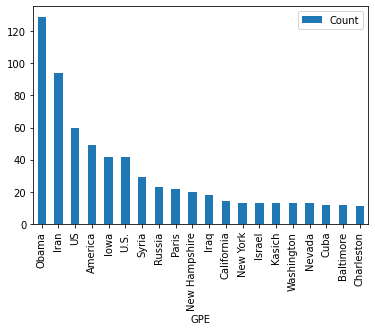

In [148]:
# FIND 20 MOST COMMON GPES FOR THE REAL NEWS

# create empty list
real_gpe = [] 

for posts in tqdm(nlp.pipe(real_news_df["title"], batch_size=500)):
    # get GPE for each headline
    for entity in posts.ents:
        # if it is a gpe
        if entity.label_ == "GPE":
            real_gpe.append(entity.text)
            
# Get the top 20 most common GPEs
gpe_count_real = Counter(real_gpe).most_common(20)
# Make into dataframe
gpe_count_real = pd.DataFrame(gpe_count_real)
# rename the columns to GPE and Count
gpe_count_real.rename(columns={0: "GPE", 1: "Count"}, inplace=True)

# Create bar plot over 20 most common GPEs
gpe_count_real.plot.bar(x="GPE", y="Count")

3164it [00:05, 594.22it/s]


<AxesSubplot:xlabel='GPE'>

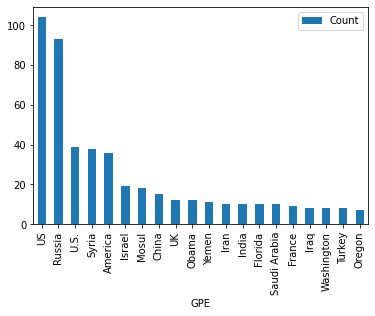

In [149]:
# FIND 20 MOST COMMON GPES FOR THE FAKE NEWS

# create empty list
fake_gpe = [] 

for posts in tqdm(nlp.pipe(fake_news_df["title"], batch_size=500)):
    # get GPE for each headline
    for entity in posts.ents:
        # if it is a gpe
        if entity.label_ == "GPE":
            fake_gpe.append(entity.text)
            
# Get the top 20 most common GPEs
gpe_count_fake = Counter(fake_gpe).most_common(20)
# Make into dataframe
gpe_count_fake = pd.DataFrame(gpe_count_fake)
# rename the columns to GPE and Count
gpe_count_fake.rename(columns={0: "GPE", 1: "Count"}, inplace=True)

# Create bar plot over 20 most common GPEs
gpe_count_fake.plot.bar(x="GPE", y="Count")